In [ ]:
# For data reading
import pandas as pd 

# For reading the array 
import numpy as np

# For visualize the data and plottting parameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,108]
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For data reading | manipulation :
import pandas as pd 

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

# To suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Import train-test split :
from sklearn.model_selection import train_test_split

# Import 'stats' libraries for modeling :
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

# To scaled the data :
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # Scaling
import math
from sklearn.metrics import  r2_score
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#PM2.5

##dealing with the missing values

In [ ]:
# Reading data :
pm25 = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/pollutants/Daily_data/nagpur/pm25_1.csv')
satpm25=pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/relationship/nagpur/PM25_1.csv')


In [ ]:
# Print the first five observations to see the data structure :
pm25

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,SO2
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,NaN
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,NaN
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,NaN
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,NaN
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,NaN
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,21.132
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,7.310
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,10.482
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,7.460


In [ ]:
satpm25

,Date,Satellite,converted,CPCB,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,01-01-16,4.684920e-11,0.046849,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-16,3.076670e-11,0.030767,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-16,1.778370e-11,0.017784,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-16,1.219080e-11,0.012191,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-16,1.372500e-11,0.013725,NaN,NaN,NaN,NaN,slope:,5.686761
...,...,...,...,...,...,...,...,...,...
1456,27-12-19,1.502720e-12,0.001503,21.132,NaN,NaN,NaN,NaN,NaN
1457,28-12-19,5.616670e-12,0.005617,7.310,NaN,NaN,NaN,NaN,NaN
1458,29-12-19,3.432670e-11,0.034327,10.482,NaN,NaN,NaN,NaN,NaN
1459,30-12-19,6.615420e-11,0.066154,7.460,NaN,NaN,NaN,NaN,NaN


In [ ]:
pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1461 non-null   object 
 1   T2M          1461 non-null   float64
 2   PRECTOTCORR  1461 non-null   float64
 3   PS           1461 non-null   float64
 4   RH2M         1461 non-null   float64
 5   WS10M        1461 non-null   float64
 6   WD10M        1461 non-null   float64
 7    SO2         960 non-null    float64
dtypes: float64(7), object(1)
memory usage: 91.4+ KB


In [ ]:
satpm25=satpm25.iloc[:,0:3]
satpm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1461 non-null   object 
 1   Satellite  490 non-null    float64
 2   CPCB       962 non-null    float64
dtypes: float64(2), object(1)
memory usage: 34.4+ KB


In [ ]:
extracted_col=satpm25['Satellite']

pm25=pm25.join(extracted_col)

extracted_col1=satpm25['CPCB']
pm25=pm25.join(extracted_col1)



In [ ]:
pm25

,Date,RH2M,PRECTOTCORR,WS10M,WD10M,PM2.5,Satellite,CPCB
0,01-01-16,35.364,0.000,1.833,144.251,NaN,NaN,NaN
1,02-01-16,33.180,0.000,1.525,122.000,NaN,NaN,NaN
2,03-01-16,32.533,0.000,2.902,62.701,NaN,NaN,NaN
3,04-01-16,35.076,0.000,2.675,85.961,NaN,NaN,NaN
4,05-01-16,30.445,0.000,1.723,108.420,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1456,27-12-19,59.831,0.003,4.287,21.352,21.313,NaN,21.313
1457,28-12-19,57.939,0.000,3.411,68.008,21.824,NaN,21.824
1458,29-12-19,58.647,0.000,2.758,64.565,39.326,NaN,39.326
1459,30-12-19,66.795,0.004,2.783,74.965,35.001,NaN,35.001


In [ ]:
#finding % of the missing values in each coloumn
nullValues = pm25.isnull().sum()
nullValues

Date             0
RH2M             0
PRECTOTCORR      0
WS10M            0
WD10M            0
PM2.5          499
Satellite      971
CPCB           499
dtype: int64

In [ ]:
nullValuesPercent = 100*nullValues/len(pm25_new)
nullValuesPercent

24.229979466119097

In [ ]:
pm25_new=pm25['PM2.5'].fillna((-3)*pm25['Satellite']+36.13)

pm25_new

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1456     21.313
1457     21.824
1458     39.326
1459     35.001
1460    259.640
Name: PM2.5, Length: 1461, dtype: float64

In [ ]:
pm25_interpolate=pm25_new.interpolate()

pm25_interpolate

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1456     21.313
1457     21.824
1458     39.326
1459     35.001
1460    259.640
Name: PM2.5, Length: 1461, dtype: float64

In [ ]:
pm25_interpolate=pm25_interpolate.bfill()

In [ ]:
nullValues = pm25_interpolate.isnull().sum()
nullValues

0

In [ ]:
pm25_interpolate.columns=['filled']
pm25_interpolate.head()

0    66.65
1    66.65
2    66.65
3    66.65
4    66.65
Name: PM2.5, dtype: float64

In [ ]:
pm25_interpolate.to_csv('filled.csv', index=False)

###train test split


In [ ]:
pm25 = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/processed_data/nagpur/pm25.csv')

In [ ]:
pm25

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM25
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,66.650
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,66.650
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,66.650
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,66.650
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,66.650
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,21.313
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,21.824
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,39.326
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,35.001


In [ ]:
pm25=pm25.drop(['Date'],axis=1)

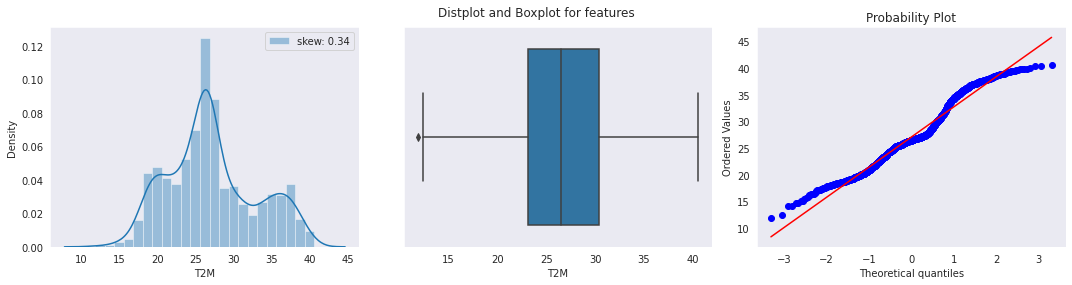

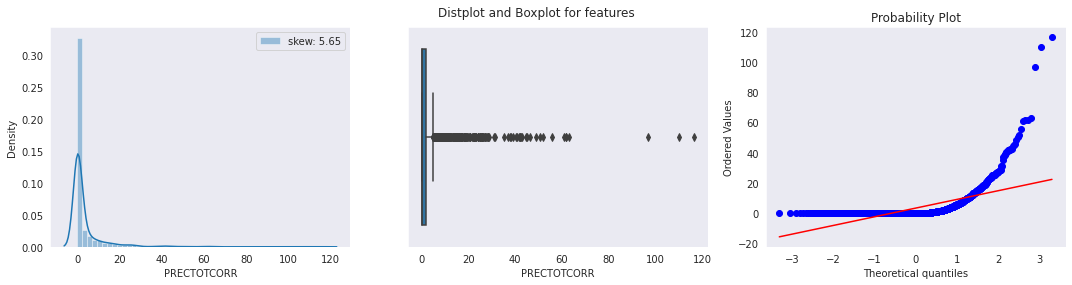

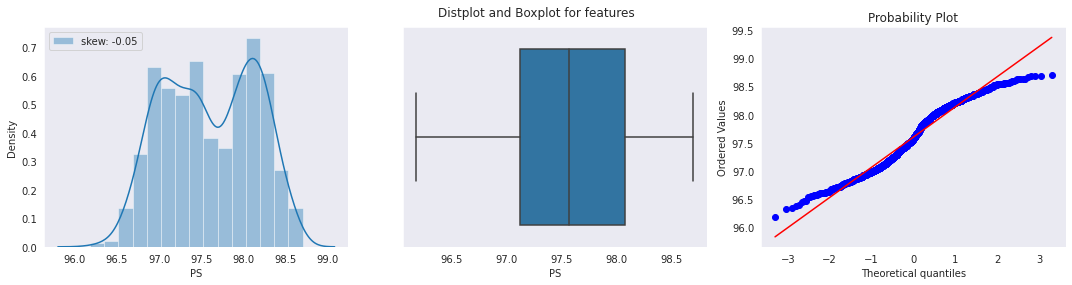

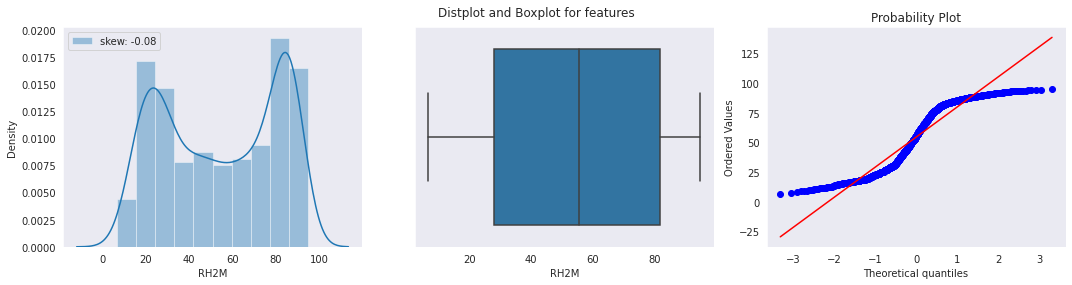

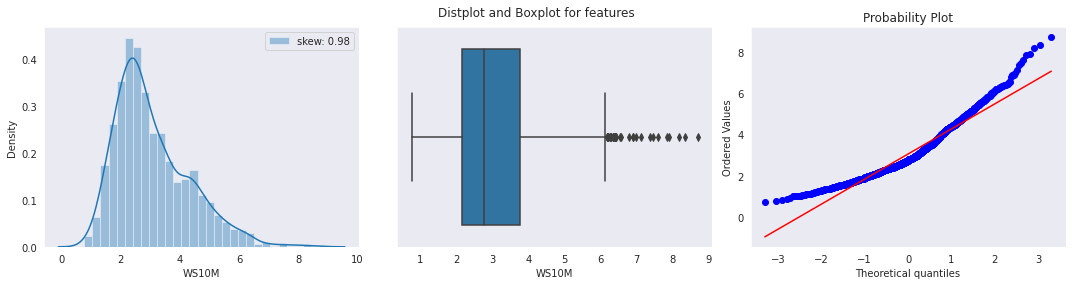

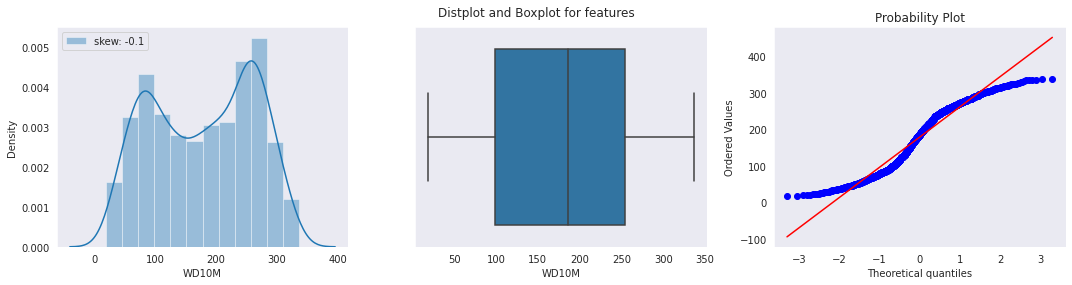

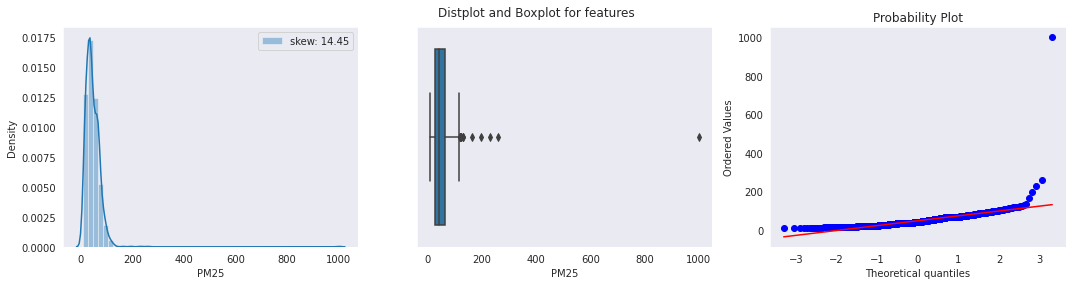

In [ ]:
from scipy import stats
features=pm25.columns
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(pm25[col], label="skew: " + str(np.round(pm25[col].skew(),2)))
    plt.suptitle("Distplot and Boxplot for features")
    plt.legend()
    plt.subplot(132)
    sns.boxplot(pm25[col])
    plt.subplot(133)
    stats.probplot(pm25[col], plot=plt)
    plt.tight_layout()
    plt.show()

###Correlation

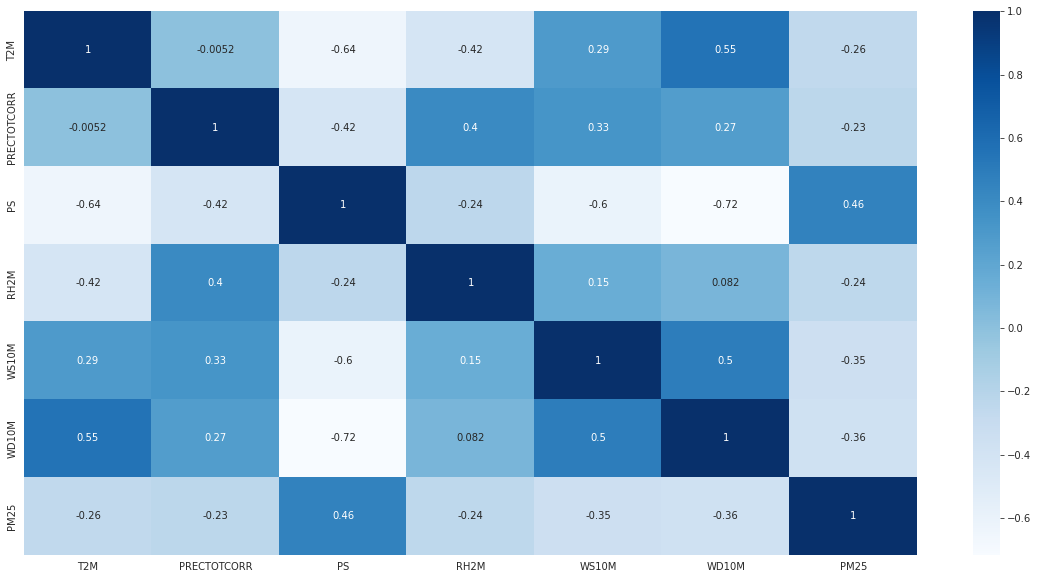

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(pm25.corr(), annot=True, cmap='Blues')

plt.show()

###independent variable and dependent varialbe

In [ ]:
 x=pm25.iloc[:,:-1]
y=pm25.iloc[:,-1]

In [ ]:
x

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M
0,23.26,0.00,98.55,35.38,1.84,144.25
1,23.38,0.00,98.53,33.19,1.52,137.00
2,21.19,0.00,98.45,32.56,2.90,62.69
3,20.94,0.00,98.51,35.06,2.67,86.00
4,21.66,0.00,98.41,30.44,1.73,108.44
...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38
1457,11.83,0.00,98.43,57.94,3.41,68.00
1458,12.38,0.00,98.43,58.62,2.76,64.56
1459,14.22,0.10,98.35,66.81,2.78,75.00


In [ ]:
y

0        66.650
1        66.650
2        66.650
3        66.650
4        66.650
         ...   
1456     21.313
1457     21.824
1458     39.326
1459     35.001
1460    259.640
Name: PM25, Length: 1461, dtype: float64

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

###yeo-johnshon tranformation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt_x = PowerTransformer(method='yeo-johnson')
pt_y = PowerTransformer(method='yeo-johnson')
x_train = pt_x.fit_transform(x_train)
x_test = pt_x.transform(x_test)
y_train = pt_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = pt_y.transform(np.array(y_test).reshape(-1,1))

###SVR without any hyperparameter tunning

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([-0.81102069,  0.08471319,  0.05732908, -0.72520329,  0.18308843,
        0.96252516,  0.13122395, -0.74694973, -0.09133704,  0.39905026,
       -1.02774379,  1.25528014, -1.16124953, -0.90735111, -0.35806024,
       -0.89770163, -1.18331024,  0.63569255,  0.79649263, -0.13296373,
       -0.49858716,  1.15667655,  0.71713161, -1.12335154, -1.37231762,
       -0.9948347 , -0.72960793,  0.08406606, -1.43672576,  0.02134388,
        1.15259781,  0.37666992,  1.02370285,  1.07311398,  0.97997682,
       -0.42487754,  0.51105643,  0.57664861, -0.0947249 ,  0.13919584,
       -0.80728623,  0.67200741,  1.01095868,  1.0607833 , -1.4018446 ,
        0.98701357,  0.86098795, -0.93076554, -0.49689494,  0.78052687,
       -0.39185528,  0.20547783, -0.44059848,  0.79028341,  0.48389795,
       -1.06054883, -1.13770155,  0.7815544 , -0.80541862,  0.03392582,
        0.69491373,  0.28453902, -1.54952951, -0.95930975, -0.83229825,
       -0.07265944, -1.37925543,  0.18050464, -1.09116395,  0.35

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.6298284378992806
mean_sqrd_error is  0.35062726166495106
Root mean squared error of is 0.5921378738646524
Mean Absolute error is 0.46062891285875524


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[35.34219999],
       [75.17      ],
       [33.38800008],
       [43.73356647],
       [53.709     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)

In [ ]:
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[26.02373299],
       [42.69887633],
       [42.06378855],
       [27.30155164],
       [45.05736558]])

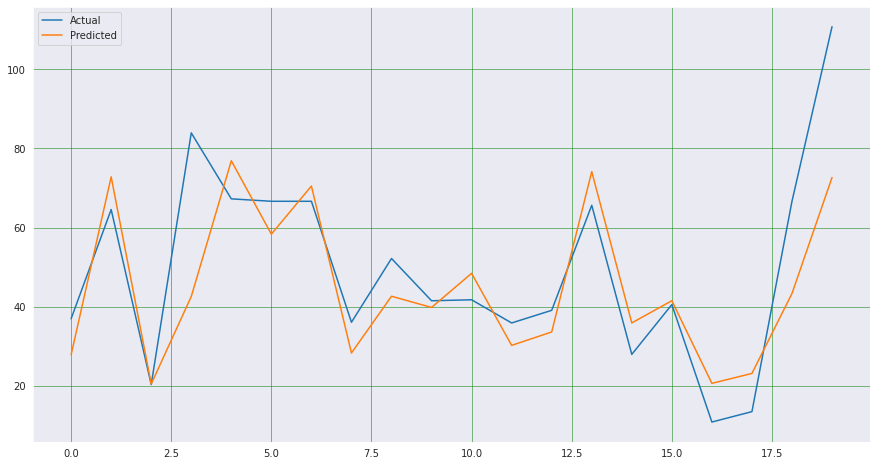

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL PM2.5"] = y_test.flatten()
result["PREDICTED PM2.5"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL PM2.5"] - result["PREDICTED PM2.5"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL PM2.5"] - result["PREDICTED PM2.5"] ) / result["ACTUAL PM2.5"] ) * 100
result.head(15)

,ACTUAL PM2.5,PREDICTED PM2.5,DIFFERENCE,PERCENTAGE ERROR
0,35.342200,26.023733,9.318467,26.366403
1,75.170000,42.698876,32.471124,43.196919
2,33.388000,42.063789,-8.675788,25.984750
3,43.733566,27.301552,16.432015,37.573004
4,53.709000,45.057366,8.651634,16.108351
5,67.366000,68.745810,-1.379810,2.048230
6,55.102000,43.798742,11.303258,20.513336
7,21.141000,26.972230,-5.831230,27.582564
8,33.940600,38.771293,-4.830692,14.232785
9,63.174000,50.683226,12.490774,19.772018


###SVR using the hyperparameter tunning

In [ ]:
##applying Gridsearchcv on SVR
svr=SVR(kernel='rbf')
grid_sv = GridSearchCV(svr, param_grid={"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}, scoring='r2', verbose=3)
grid_sv.fit(x_train, y_train)
print(grid_sv.best_score_)
print(grid_sv.best_estimator_)
print(grid_sv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.570 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.503 total time=   0.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.603 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.606 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.566 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.646 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.513 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.586 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.599 total time=   0.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.515 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=0.01

In [ ]:

#SVR
regressor = SVR(kernel = 'rbf', C=1, gamma=1)
regressor.fit(x_train,y_train)

NameError: ignored

In [ ]:
y_prediction=regressor.predict(x_test)
y_prediction

array([-9.78895462e-01,  2.44623336e-01,  1.23160772e-01, -4.16169782e-01,
        2.30707391e-01,  8.53309059e-01, -7.59245525e-01, -1.22058137e+00,
        1.95798286e-02,  3.32995143e-01, -9.80630840e-01,  1.12568191e+00,
       -6.33840870e-01, -7.85644807e-01, -2.82310112e-01, -6.61876163e-01,
       -1.18347484e+00,  8.81096808e-01,  8.00503167e-01, -2.03501651e-01,
       -2.23126349e-01,  1.25407465e+00,  9.83798703e-01, -1.32108323e+00,
       -1.37618744e+00, -7.17805423e-01, -4.58738210e-02,  2.56805400e-01,
       -1.35270188e+00, -6.36780672e-01,  1.47638956e+00,  4.58998623e-01,
        1.30332343e+00,  1.12623920e+00,  1.24196138e+00, -4.75104261e-01,
        4.43459837e-01,  8.09650264e-01,  2.64953009e-01,  7.72412315e-01,
       -1.16448688e+00,  1.04455626e+00,  1.12572481e+00,  1.22216286e+00,
       -1.68193621e+00,  1.18386709e+00,  7.22171844e-01, -8.00741789e-01,
       -3.42739409e-03,  5.21864739e-01, -4.53496901e-01,  1.35817634e-01,
       -4.51071257e-01,  

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.5956646449452563
mean_sqrd_error is  0.3829872763121556
Root mean squared error of is 0.6188596580099204
Mean Absolute error is 0.46765731131376537


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[35.34219999],
       [75.17      ],
       [33.38800008],
       [43.73356647],
       [53.709     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)

In [ ]:
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[23.68612772],
       [46.59587627],
       [43.60613379],
       [32.41535475],
       [46.24357905]])

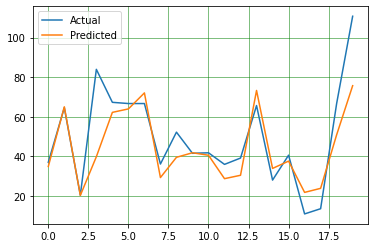

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,35.342200,23.686128,11.656072,32.980608
1,75.170000,46.595876,28.574124,38.012670
2,33.388000,43.606134,-10.218134,30.604210
3,43.733566,32.415355,11.318212,25.879919
4,53.709000,46.243579,7.465421,13.899758
5,67.366000,64.816591,2.549409,3.784414
6,55.102000,26.787699,28.314301,51.385252
7,21.141000,20.666431,0.474569,2.244780
8,33.940600,41.203187,-7.262587,21.397933
9,63.174000,48.894242,14.279758,22.603853


###Using KNN

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
hp_candidates = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsRegressor()
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=5, scoring='r2')
grid.fit(x_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6327670733889124
KNeighborsRegressor(n_neighbors=7, weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
regressor=KNeighborsRegressor(n_neighbors=7, weights='distance')
regressor.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=7, weights='distance')

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([[-1.00671483],
       [-0.13365074],
       [-0.01504771],
       [-0.9825358 ],
       [ 0.11441858],
       [ 1.04263227],
       [-0.8983033 ],
       [-0.95976135],
       [-0.23601623],
       [ 0.2203531 ],
       [-0.8222789 ],
       [ 1.20687297],
       [-0.37562516],
       [-0.96277197],
       [-0.2820606 ],
       [-0.89039119],
       [-1.27807457],
       [ 0.9093623 ],
       [ 0.96599351],
       [-0.25551298],
       [-0.70141571],
       [ 1.41935673],
       [ 1.03766364],
       [-1.07824989],
       [-1.26861084],
       [-1.15262543],
       [-0.19654644],
       [ 0.75303447],
       [-1.47199782],
       [-0.19952894],
       [ 1.42194819],
       [ 0.82037348],
       [ 1.49140503],
       [ 1.00490884],
       [ 1.16108479],
       [-0.54669512],
       [ 0.41695035],
       [ 0.78172445],
       [ 0.61348388],
       [ 0.90557754],
       [-1.10467864],
       [ 1.21597427],
       [ 0.86328206],
       [ 1.19223452],
       [-1.55370231],
       [ 1

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.5755096043920492
mean_sqrd_error is  0.4020781719979625
Root mean squared error of is 0.6340963428359783
Mean Absolute error is 0.4901552464777477


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[35.34219999],
       [75.17      ],
       [33.38800008],
       [43.73356647],
       [53.709     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)

In [ ]:
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[23.31847284],
       [37.88036404],
       [40.42865555],
       [23.63770836],
       [43.39822689]])

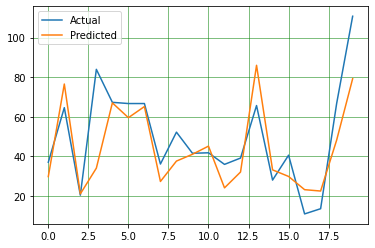

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,35.342200,23.318473,12.023727,34.020879
1,75.170000,37.880364,37.289636,49.607072
2,33.388000,40.428656,-7.040655,21.087383
3,43.733566,23.637708,20.095858,45.950650
4,53.709000,43.398227,10.310773,19.197477
5,67.366000,71.773721,-4.407721,6.542946
6,55.102000,24.782384,30.319616,55.024529
7,21.141000,23.942171,-2.801171,13.249944
8,33.940600,35.805482,-1.864882,5.494547
9,63.174000,45.983116,17.190884,27.211961


###Ensembling approach


In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn import svm
from sklearn import metrics

In [ ]:
knn= KNeighborsRegressor(n_neighbors=7, weights='distance')

svr= svm.SVR(kernel='rbf', C=1, gamma=1)

In [ ]:
evc = VotingRegressor( estimators= [('knn',knn),('svr',svr)])

In [ ]:
evc.fit(x_train,y_train)

VotingRegressor(estimators=[('knn',
                             KNeighborsRegressor(n_neighbors=7,
                                                 weights='distance')),
                            ('svr', SVR(C=1, gamma=1))])

In [ ]:
pred=evc.predict(x_test)

In [ ]:
r2_score(y_test, pred)

0.6001184205435846

###Random forest 

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)



In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}  



In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 4, max_features = 'auto', max_depth= 50, bootstrap=True) 
regressor.fit( x_train, y_train) 

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=10)

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([-0.85803836, -0.12099048, -0.04346513, -0.56673773, -0.14969027,
        1.08932669,  0.20954679, -0.91709265, -0.15385454, -0.45455779,
       -0.9360579 ,  1.21262787, -0.61044221, -0.90142643, -0.32159958,
       -0.87095592, -1.43871172,  1.05380803,  0.63823771, -0.15626795,
       -0.43155921,  1.32271842,  0.92267273, -1.16529225, -1.14566634,
       -0.9100228 , -0.23972709,  0.26457492, -1.4418784 , -0.28670675,
        1.2552674 ,  0.34272351,  1.00750279,  0.95143096,  1.25313657,
       -0.3145741 ,  0.26094876,  0.50223215,  0.27254594,  0.11032222,
       -0.97719752,  0.87035149,  0.84305423,  1.12686842, -1.33958717,
        1.04753757,  0.90317689, -1.03864257, -0.39312237,  1.01423501,
       -0.70663781,  0.13854852, -0.84341022,  0.61187894,  0.37543565,
       -1.03125389, -1.3653846 ,  0.60768242, -0.60975415,  0.06322067,
        0.81661891, -0.04328101, -1.52278213, -0.95505249, -0.68780728,
       -0.66180421, -1.35907317,  0.29427444, -1.03599703,  0.11

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.642731863630355
mean_sqrd_error is  0.3384051103886391
Root mean squared error of is 0.581725975342892
Mean Absolute error is 0.4541847196188027


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[35.34219999],
       [75.17      ],
       [33.38800008],
       [43.73356647],
       [53.709     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[25.34790347],
       [38.14484967],
       [39.80349732],
       [29.81932749],
       [37.54780709]])

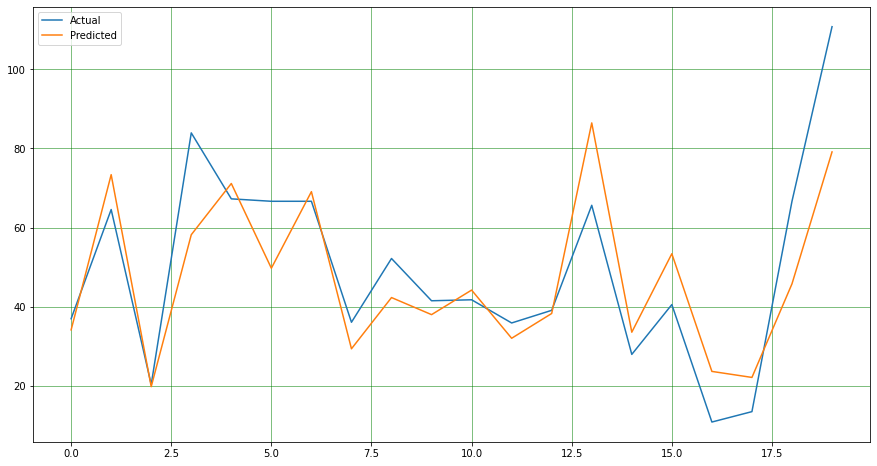

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,35.342200,25.347903,9.994297,28.278649
1,75.170000,38.144850,37.025150,49.255222
2,33.388000,39.803497,-6.415497,19.214979
3,43.733566,29.819327,13.914239,31.815926
4,53.709000,37.547807,16.161193,30.090288
5,67.366000,73.598008,-6.232008,9.250969
6,55.102000,45.712790,9.389210,17.039691
7,21.141000,24.522594,-3.381594,15.995431
8,33.940600,37.461926,-3.521326,10.374966
9,63.174000,31.733731,31.440269,49.767735


###Withour hyperparameter tunning RF

In [ ]:


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_fs,y_train)

RandomForestRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test_fs)
y_prediction 



array([-0.87685051, -0.23667709,  0.03929299, -0.55583403, -0.2374794 ,
        1.16553561, -0.29358767, -0.97975819, -0.18114896, -0.51711968,
       -0.91108291,  1.16308427, -0.40985601, -0.91983952, -0.31568458,
       -0.85202298, -1.40961339,  1.01245889,  0.76073221, -0.15916003,
       -0.54010738,  1.3509829 ,  0.97098035, -1.2245906 , -1.1460948 ,
       -0.80147102, -0.22065047,  1.02391992, -1.42138852, -0.27413875,
        1.26711599,  0.33442088,  1.20657847,  0.90546494,  1.23967207,
       -0.17265458,  0.24563306,  0.39164052,  0.86981904,  0.12730002,
       -1.0110635 ,  0.81072433,  0.85122689,  1.16056024, -1.45661695,
        0.99031187,  0.80732748, -1.01946258, -0.32339101,  0.76286712,
       -0.73097058,  0.15930549, -0.92189376,  0.6118556 ,  0.42429676,
       -1.13883385, -1.32073473,  0.83582434, -0.76372699,  0.08839649,
        0.79475298, -0.24143607, -1.66093924, -0.94921844, -0.73083843,
       -0.73752168, -1.18765452,  0.31690692, -0.8823431 ,  0.42

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.6320078728470314
mean_sqrd_error is  0.3485628964193602
Root mean squared error of is 0.5903921547745703
Mean Absolute error is 0.4546710398713125


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[35.34219999],
       [75.17      ],
       [33.38800008],
       [43.73356647],
       [53.709     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[25.08218385],
       [35.79244755],
       [41.6504707 ],
       [30.00046025],
       [35.77662935]])

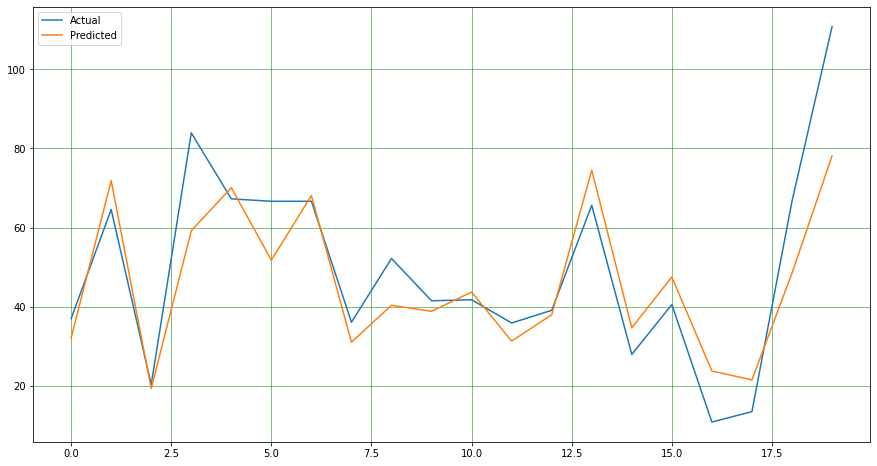

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,35.342200,25.082184,10.260016,29.030497
1,75.170000,35.792448,39.377552,52.384665
2,33.388000,41.650471,-8.262471,24.746827
3,43.733566,30.000460,13.733106,31.401752
4,53.709000,35.776629,17.932371,33.388018
5,67.366000,76.672540,-9.306540,13.814892
6,55.102000,34.686849,20.415151,37.049747
7,21.141000,23.674644,-2.533644,11.984505
8,33.940600,36.903668,-2.963068,8.730157
9,63.174000,30.652092,32.521908,51.479894


###Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([-6.66695207e-01,  3.47243199e-02, -1.58262795e-02, -7.24428659e-01,
        3.47870395e-02,  1.10477868e+00, -2.15114931e-01, -7.33924763e-01,
       -3.98116781e-02, -4.40934203e-01, -9.50482604e-01,  1.15550263e+00,
       -9.69203256e-01, -8.60251625e-01, -4.68492035e-01, -9.16822025e-01,
       -1.16107337e+00,  8.11310952e-01,  5.06357507e-01, -2.45642056e-02,
       -4.62155990e-01,  1.10497141e+00,  7.38712060e-01, -1.08844249e+00,
       -1.32934859e+00, -6.84587717e-01, -5.57474637e-01,  8.78002204e-01,
       -1.38386061e+00, -1.21751297e-02,  1.02321977e+00,  2.74630751e-01,
        1.01811583e+00,  1.14041288e+00,  9.10499880e-01, -4.74113202e-01,
        5.46261260e-01,  5.92703987e-01,  5.28400942e-01,  4.67001910e-01,
       -8.04295221e-01,  7.47687906e-01,  8.00831124e-01,  1.07799761e+00,
       -1.33517574e+00,  1.12634288e+00,  8.14557454e-01, -1.04445120e+00,
       -5.24452909e-01,  7.72447385e-01, -5.60232166e-01,  1.30434657e-01,
       -7.94816030e-02,  

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.6171825138880721
mean_sqrd_error is  0.36260550678488984
Root mean squared error of is 0.6021673411809128
Mean Absolute error is 0.4710189080338373


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[35.34219999],
       [75.17      ],
       [33.38800008],
       [43.73356647],
       [53.709     ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[28.2066487 ],
       [41.54639569],
       [40.41140274],
       [27.31335251],
       [41.54782276]])

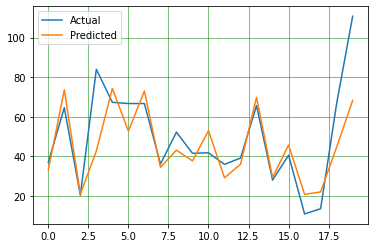

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:


result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)



,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,35.342200,28.206649,7.135551,20.189890
1,75.170000,41.546396,33.623604,44.730084
2,33.388000,40.411403,-7.023403,21.035709
3,43.733566,27.313353,16.420214,37.546021
4,53.709000,41.547823,12.161177,22.642718
5,67.366000,74.211553,-6.845553,10.161733
6,55.102000,36.220084,18.881916,34.267206
7,21.141000,27.169020,-6.028020,28.513411
8,33.940600,39.883347,-5.942747,17.509257
9,63.174000,31.974052,31.199948,49.387323


##Statistical method

###Base model- ARIMA

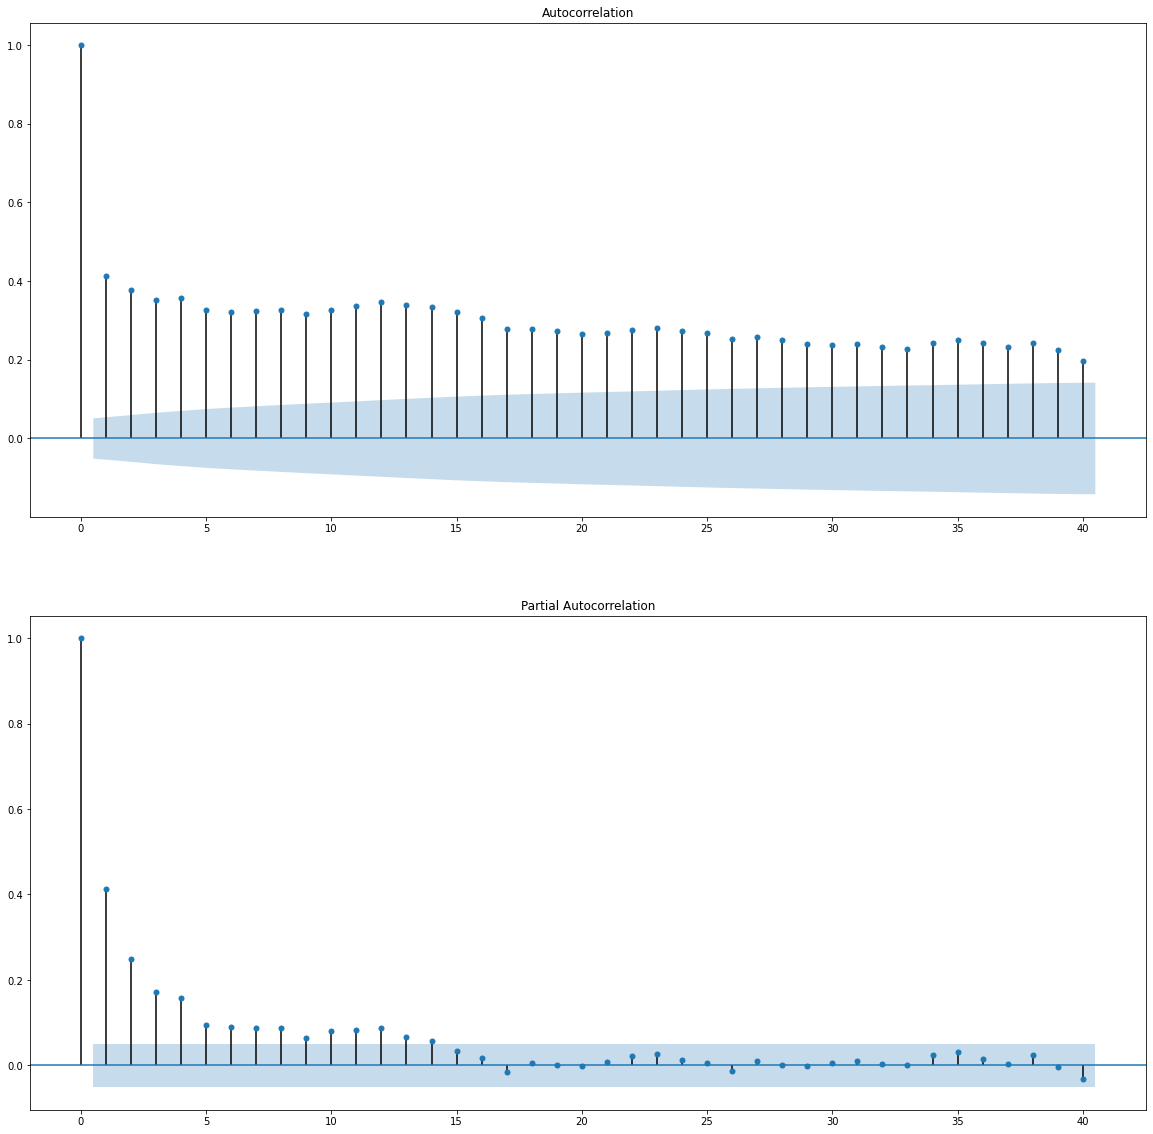

In [ ]:
# Import library ACF and PACF :
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# PLot :
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(pm25.PM25,lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pm25.PM25,lags=40,ax=ax2)
plt.show()

In [ ]:
#change the datetime variable into the datatype
pm25['Date']= pm25['Date'].apply(pd.to_datetime)

In [ ]:
daily=pm25.set_index('Date')

In [ ]:
daily

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,PM25
Date,,,,,,,
2016-01-01,23.26,0.00,98.55,35.38,1.84,144.25,66.650
2016-02-01,23.38,0.00,98.53,33.19,1.52,137.00,66.650
2016-03-01,21.19,0.00,98.45,32.56,2.90,62.69,66.650
2016-04-01,20.94,0.00,98.51,35.06,2.67,86.00,66.650
2016-05-01,21.66,0.00,98.41,30.44,1.73,108.44,66.650
...,...,...,...,...,...,...,...
2019-12-27,15.15,0.07,98.29,59.81,4.29,21.38,21.313
2019-12-28,11.83,0.00,98.43,57.94,3.41,68.00,21.824
2019-12-29,12.38,0.00,98.43,58.62,2.76,64.56,39.326


In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(pm25['PM25'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(PM25):
    result=adfuller(PM25)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(pm25['PM25'])

ADF Test Statistic : -3.868905638230602
p-value : 0.0022759829045469046
#Lags Used : 13
Number of Observations Used : 1447
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#creating Train test split
train=daily[:int(0.8*(len(daily)))]
print('Train shape', train.shape)

valid=daily[int(0.8*(len(daily))):]
print('Test shape', valid.shape)

Train shape (1168, 7)
Test shape (293, 7)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(daily.PM25,  order=(1,1,1)) 
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.PM25   No. Observations:                 1460
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6997.625
Method:                       css-mle   S.D. of innovations             29.178
Date:                Thu, 12 May 2022   AIC                          14003.250
Time:                        05:07:49   BIC                          14024.394
Sample:                             1   HQIC                         14011.137
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0034      0.082     -0.042      0.966      -0.163       0.156
ar.L1.D.PM25     0.0854      0.030      2.840      0.005       0.026       0.144
ma.L1.D.PM25    -0.9030      0.013    -69.485      0.000      -0.928      -0.877
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           11.7032           +0.0000j           11.7032            0.0000
MA.1            1.1075           +0.0000j            1.1075            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 37.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:


# Import the library:
from pmdarima import auto_arima

stepwise_fit = auto_arima(daily.PM25, trace = True, suppress_warnings = True, seasonal = False)

stepwise_fit.summary()



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=14014.132, Time=2.83 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16025.287, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14586.803, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15339.986, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=14013.658, Time=1.48 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=15008.399, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14018.904, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=14015.249, Time=0.75 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=14844.052, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=14013.145, Time=0.96 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14330.695, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=14014.056, Time=1.46 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=14230.466, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=14015.721, Time=2.24 sec
 ARIMA(2,0,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1461
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -6997.641
Date:                Thu, 12 May 2022   AIC                          14005.281
Time:                        05:11:40   BIC                          14031.715
Sample:                             0   HQIC                         14015.142
                               - 1461                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5983      0.653      0.916      0.360      -0.682       1.879
ar.L1          1.0652      0.022     48.606      0.000       1.022       1.108
ar.L2         -0.0777      0.014     -5.514      0.000      -0.105      -0.050
ma.L1         -0.8895      0.020    -44.206      0.000      -0.929      -0.850
sigma2       846.1046      3.568    237.146      0.000     839.112     853.098
===================================================================================
Ljung-Box (Q):                       22.39   Jarque-Bera (JB):          36779235.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.40   Skew:                            24.28
Prob(H) (two-sided):                  0.00   Kurtosis:                       778.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:


mod_week = sm.tsa.statespace.SARIMAX(train.PM25,
                                order=(2, 0, 1),
                                seasonal_order=(2, 0, 1, 365),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
result_week = mod_week.fit()
result_week.summary()



In [ ]:
# Defining Function for Accuracy metrics
def forecast_accuracy(forecast, actual):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    mape = np.mean(np.abs((actual - forecast)/actual))*100  # MAPE
    rmse = np.sqrt(mean_squared_error(actual,forecast))  # RMSE
    return({'mape':mape, 'rmse':rmse})

In [ ]:
# Calculate Accuracy Metrics
pred_uc_week = result_week.get_forecast(steps=100)
forecast_accuracy(pred_uc_week.predicted_mean[:len(valid.PM25)], valid.PM25)

In [ ]:
 x=pm25.iloc[:,:-1]
y=pm25.iloc[:,-1]

###multivariate analysis

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fitting the VAR model
VAR_model_week=VAR(endog=train)
VAR_model_week_fit=VAR_model_week.fit()

# Predicting on Validation set
predict_week=VAR_model_week_fit.forecast(VAR_model_week_fit.y,steps=len(valid))

pred_week=pd.DataFrame(predict_week,columns=df.columns,index=range(0,len(predict_week)))

In [ ]:
!python --version

Python 3.7.13
